<font size="5">__A demo for _NPDS_ calculation__</font>

<font size="3">The purpose of this online tool is to demonstrate how the _NPDS_ method, proposed in the referenced paper <strong>“A Novel Statistic Guided by Clinical Experience
for Assessing the Progression of Lung Nodules”</strong> can be used to determine whether a lung nodule has progressed or not.<br> 
    We have prepared two CT images of nii format for illustration, readers can use them to run the code to obtain the results. We have a total of five steps to obtain the _NPDS_ value and its corresponding $P-$value.</font> 

<ul>
    <li><font size="4"><strong>Step 1 : Import the necessary package for calculating <em>NPDS</em>.</strong></font></li>
</ul>

In [1]:
from NPDSlib import NPDS_Hypothesis_Testing as NPDS_HT

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<ul>
    <li><font size="4"><strong>Step 2 : Prepare nii CT data paths, nodule coordinates, and nodule diameter.</strong></font></li>
</ul>

In [2]:
# CT paths
baseline_CT_nii_path = './Data/patient1_baseline.nii.gz'
followup_CT_nii_path = './Data/patient1_followup.nii.gz'
# nodule position and diameter in follow-up CT
X=129
Y=288
range_Z = '122-141'
diameter = 12 # unit mm

<font size="3">The coordinates ("X","Y") represent the center of the nodule.<br>
    The "range_Z" represents the nodule's coverage along the Z-axis.<br>
    The "diameter" represents the maximum diameter of the nodule, measured in millimeters (mm).<font/>

<ul>
    <li><font size="4"><strong>Step 3 : Initialization.</strong></font></li>
</ul>

In [3]:
nodule_progress_detector = NPDS_HT(X, Y, range_Z, diameter, baseline_CT_nii_path, followup_CT_nii_path)

baseline CT size : (447, 512, 512)
follow-up CT size : (520, 512, 512)
Initialization complete.


<ul>
    <li><font size="4"><strong>Step 4 : Preprocess baseline CT and follow-up CT (registration and lung mask extraction).</strong></font></li>
</ul>

<font size="3">The registration between the two CT scans is performed using the classical Elastix algorithm.<br>
    When performing the registration, it is important to ensure that the slice thickness of the two CT scans does not differ significantly.<font/>

In [4]:
nodule_progress_detector.registration_by_elastix()

Running registration algorithm...
Registration complete.
baseline CT size : (520, 512, 512)
follow-up CT size : (520, 512, 512)


<font size="3">Extract the lung mask for excluding any noise outside the lung tissue.<font/>

In [5]:
nodule_progress_detector.get_segmented_lungs()

Running lung mask extraction ...
Lung mask extraction complete.


<font size="3">Visualize the preprocessed basline CT slices as a GIF.<font/>

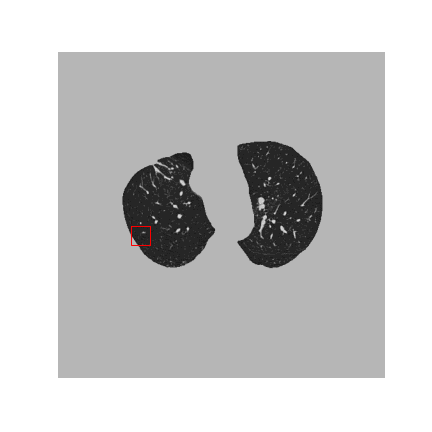

In [6]:
nodule_progress_detector.visualize_ct_slices_as_gif(nodule_progress_detector.bf_sub_image, gif_path='./Data/baseline_CT_slices_example.gif')

<font size="3">Visualize the preprocessed follow-up CT slices as a GIF.<font/>

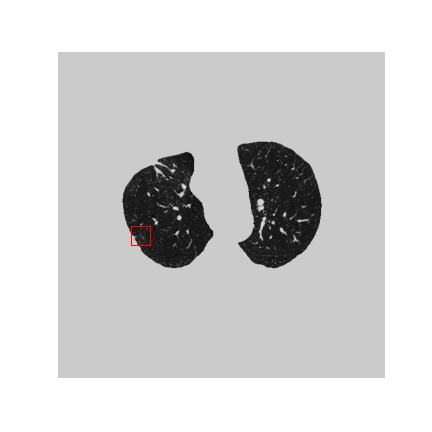

In [7]:
nodule_progress_detector.visualize_ct_slices_as_gif(nodule_progress_detector.af_sub_image, gif_path='./Data/followup_CT_slices_example.gif')

<font size="3">As illustrated in the GIF images of the two CT scans above, the nodule enclosed by the red anchor box shows significant progression in the follow-up scan compared to the baseline scan.<font/>

<ul>
    <li><font size="4"><strong>Step 5 : <em>NPDS</em> calculation and hypothesis testing.</strong></font></li>
</ul>

<font size="3">Calculate the  _NPDS_-index.<font/>

In [8]:
nodule_progress_detector.NPDS_calculate()

<font size="3">Hypothesis testing.<font/>

In [9]:
nodule_progress_detector.hypothesis_test_by_ClinvNod_sample()

NPDS : 0.2347265625
 Progression Prediction Result : True
 p_value : 0.0109708446


<font size="4">__Conclusion__<font/>

<font size="3">From Step 5, it can be observed that the nodule's ___NPDS_ is $0.2347$__ . At a 5% significance level, the hypothesis testing result indicates that __the nodule is progressive__, with a __$P-$value of $0.01 < 0.05$.__ <br>
    These predicted results are consistent with the actual condition of the nodule.<font/>

<font size="4">__How to construct your own _NPDS_ ?__<font/>

<font size="3">If you want to use your own CT images to construct NPDS, please visit www.NPDS.com, which provides the python codes required for building NPDS, along with all its dependencies. 
<br>Before that, make sure :</font>
<ul>
    <li><font size="3">Your CT iamges are in <strong>NIfTI (.nii)</strong> or compressed <strong>NIfTI (.nii.gz)</strong> format. If they are in DICOM format, please convert them to NIfTI first.</font></li>
    <li><font size="3">The slice thickness of the two CT scans is similar and the entire lung tissue in images is clear and free of noise.</font></li>
    <li><font size="3">The nodule's center coordinates <strong>(X,Y), Z-axis range</strong>, and <strong>maximum diameter (mm)</strong> have already been measured and recorded.</font></li>
</ul>
